In [1]:
import sys

sys.path.append("..")

import pathlib

import joblib
import pandas as pd

from src.utils.io import save_txt

In [10]:
input_dir = pathlib.Path("../data/train")

In [11]:
model_dir = pathlib.Path(input_dir / "lgbm_drop/seed=42")
model_importance = []
for i in range(5):
    model = joblib.load(model_dir / f"{i}.joblib")

    _tmp = {}
    for key, value in zip(model.feature_name_, model.feature_importances_):
        _tmp[key] = value

    model_importance.append(_tmp)

In [12]:
importance_lgbm = pd.DataFrame(model_importance).T


importance_lgbm = importance_lgbm.assign(
    mean=importance_lgbm.mean(axis=1),
    std=importance_lgbm.std(axis=1),
)
importance_lgbm

,0,1,2,3,4,mean,std
agent1_selection,46363.463860,41695.349811,44724.770417,44256.575666,40648.934493,43537.818849,2326.482328
agent1_expansion,20504.950091,17998.924051,18050.837424,20297.429410,18433.431532,19057.114501,1240.559350
agent1_playout,18344.897951,16133.685472,16116.063341,20702.159982,15926.581058,17444.677561,2074.254171
agent1_score_bounds,671.498393,470.844221,707.435190,778.547794,650.919787,655.849077,114.249834
agent2_selection,45069.082638,39474.362458,44787.569240,43610.376335,42952.874948,43178.853124,2242.847781
...,...,...,...,...,...,...,...
Union,392.110984,320.546838,316.175421,356.377511,557.744472,388.591045,99.419591
Variable,93.344942,134.408948,227.039188,141.573911,149.541331,149.181664,48.620402
Vertex,27.469948,45.806980,286.764464,20.213200,5.353486,77.121616,118.094507
Visual,112.422622,124.287768,78.210098,262.402974,111.168559,137.698404,71.785499


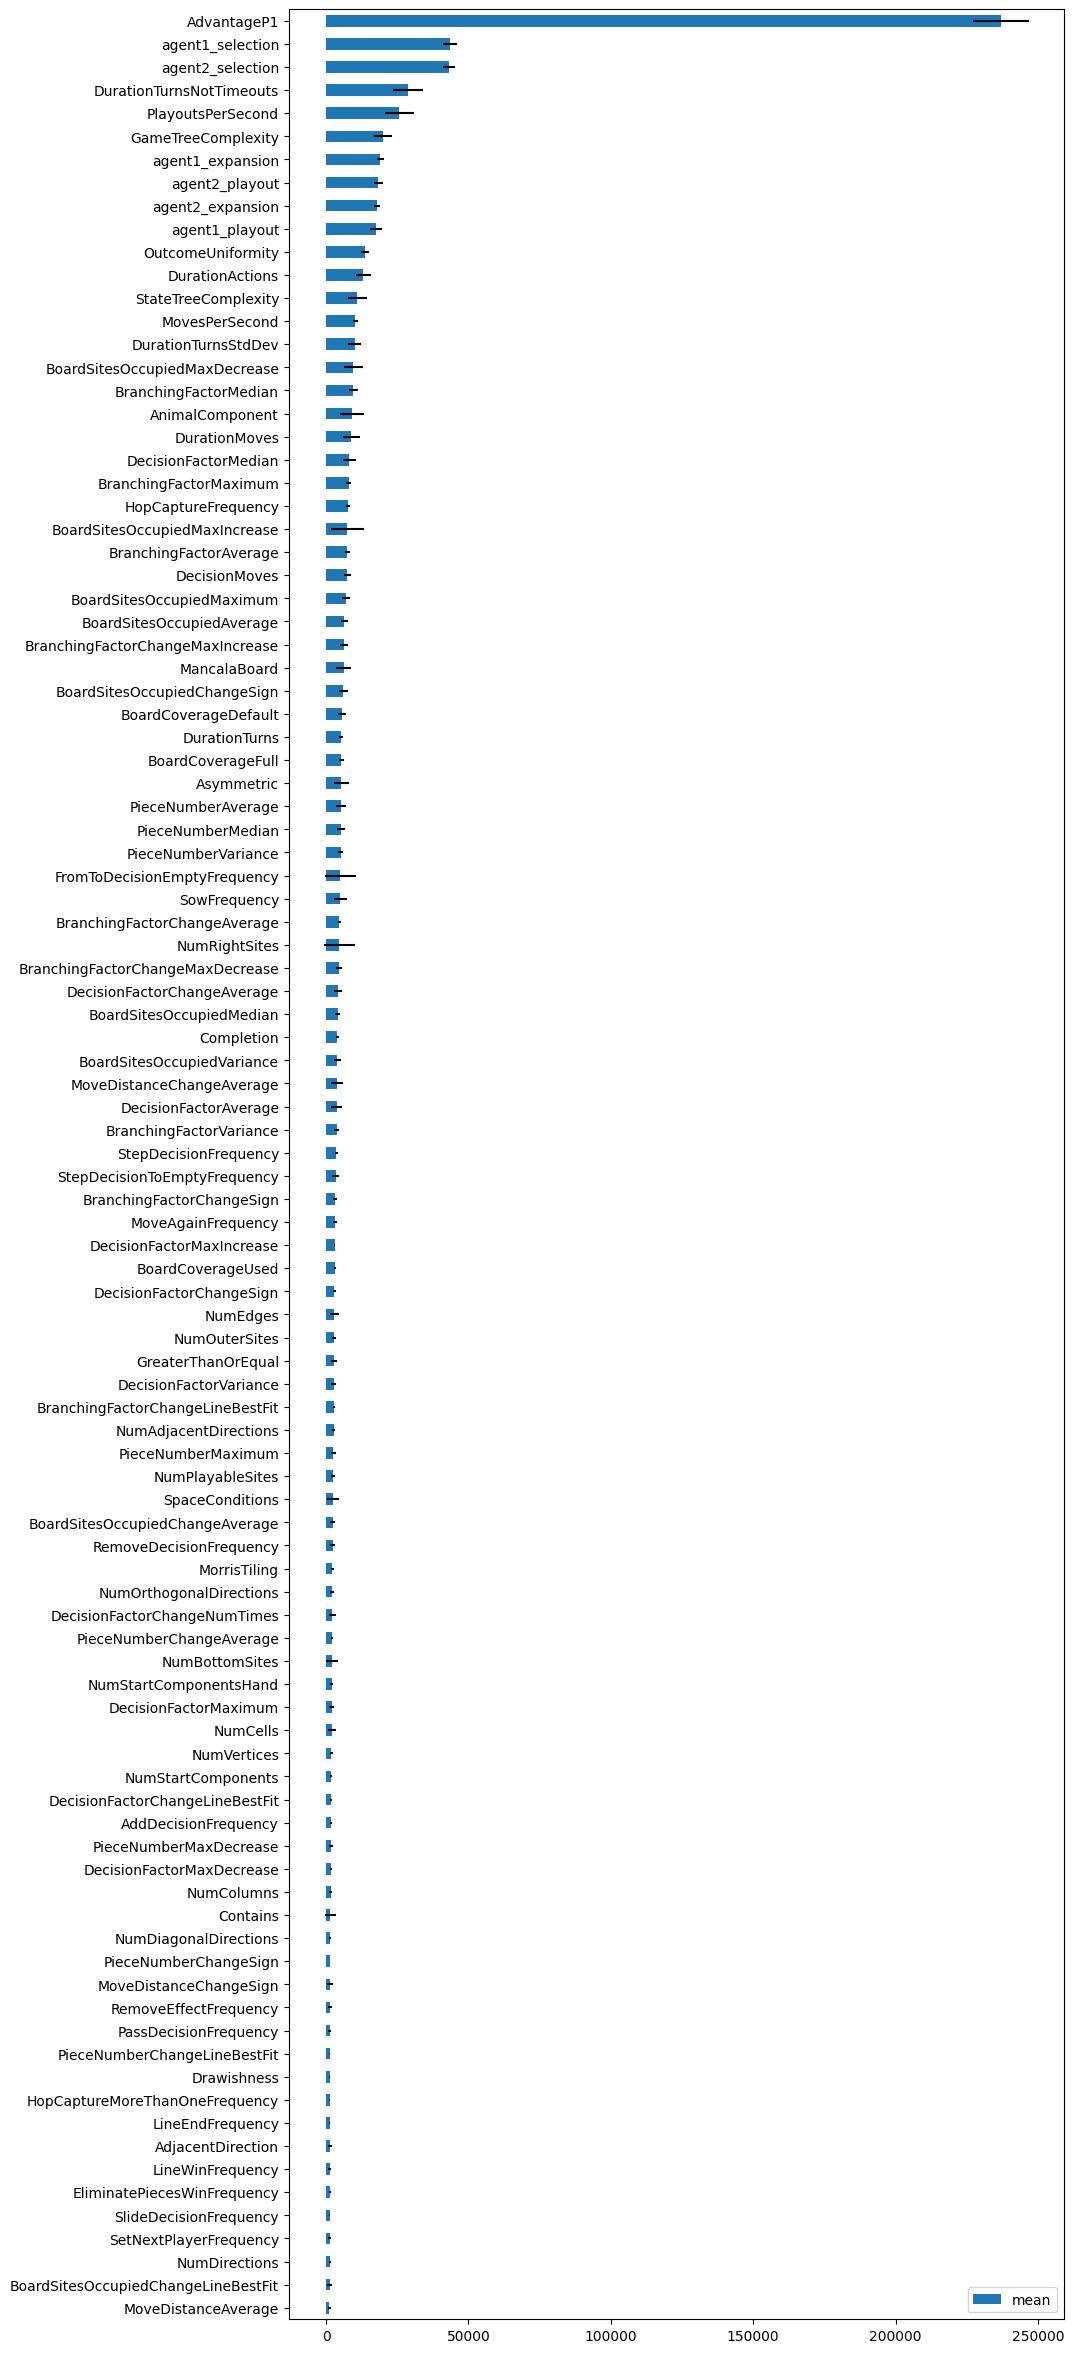

In [13]:
importance_lgbm.sort_values("mean", ascending=False).head(100).plot(
    kind="barh", y="mean", figsize=(10, 30), xerr="std"
).invert_yaxis()

In [16]:
drop_cols = []

threshold = 0.9
for col_name, flag in (
    importance_lgbm["std"] / importance_lgbm["mean"] > threshold
).items():
    if flag:
        drop_cols.append(col_name)

print(len(drop_cols))
save_txt("../data/preprocessing/drop_cols.txt", "\n".join(drop_cols))

111
